In [1]:
# Importing Required Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
import keras
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [2]:
# Collect data

data_dir = '../input/gtsrb-german-traffic-sign'
train_path = '../input/gtsrb-german-traffic-sign/Train'


# Resizing the images to 30x30x3

height = 30
width = 30
channels = 3

In [3]:
data = []
labels = []
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [4]:
# prepairng data and labels

for i in range(NUM_CATEGORIES):
    path = os.path.join(train_path,str(i))
    images = os.listdir(path)
    
    for a in images:
       
            image = Image.open(path + '/' + a)
            image = image.resize((height,width))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        
            
        
            

data = np.array(data)      
labels = np.array(labels)           

In [5]:
print(data.shape,labels.shape)

X_train, X_test, Y_train, Y_test = train_test_split(data,labels,test_size=0.2,random_state=42, shuffle=True)

X_train = X_train/255 
X_test = X_test/255

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)


(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [6]:
Y_train=keras.utils.to_categorical(Y_train,NUM_CATEGORIES)
Y_test= keras.utils.to_categorical(Y_test,NUM_CATEGORIES)

print(Y_train.shape)
print(Y_test.shape)

(31367, 43)
(7842, 43)


In [7]:
# Building model

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(height,width,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()





Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0

In [8]:
# Compiling model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [9]:
# Augmenting the data to get high accuracy

aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")



In [10]:
batch_size = 32
epochs = 15

history = model.fit(aug.flow(X_train,Y_train,batch_size=batch_size),
                    epochs=epochs, validation_data=(X_test, Y_test) )



Epoch 1/15
981/981 [==============================] - 21s 18ms/step - loss: 2.5712 - accuracy: 0.2783 - val_loss: 0.3333 - val_accuracy: 0.9074
Epoch 2/15
981/981 [==============================] - 17s 17ms/step - loss: 0.6924 - accuracy: 0.7806 - val_loss: 0.0704 - val_accuracy: 0.9828
Epoch 3/15
981/981 [==============================] - 17s 18ms/step - loss: 0.3328 - accuracy: 0.8923 - val_loss: 0.0354 - val_accuracy: 0.9909
Epoch 4/15
981/981 [==============================] - 17s 18ms/step - loss: 0.2459 - accuracy: 0.9230 - val_loss: 0.0254 - val_accuracy: 0.9932
Epoch 5/15
981/981 [==============================] - 16s 17ms/step - loss: 0.1843 - accuracy: 0.9419 - val_loss: 0.0183 - val_accuracy: 0.9957
Epoch 6/15
981/981 [==============================] - 18s 18ms/step - loss: 0.1423 - accuracy: 0.9556 - val_loss: 0.0415 - val_accuracy: 0.9880
Epoch 7/15
981/981 [==============================] - 17s 17ms/step - loss: 0.1421 - accuracy: 0.9561 - val_loss: 0.0127 - val_accuracy:

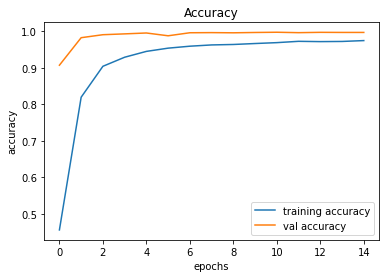

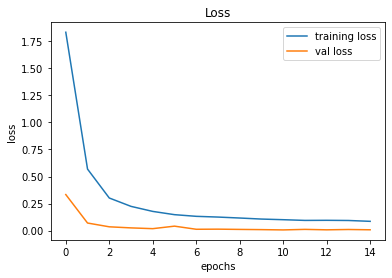

In [11]:
# plotting graphs for accuracy 

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [12]:
# prepairng test data

test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
images = test["Path"].values

data=[]

for a in images:
        
            image = Image.open(data_dir + '/' + a)
            image = image.resize((height,width))
            image = np.array(image)
            data.append(image)
            

In [13]:
X_pred = np.array(data)
X_pred = X_pred/255

In [14]:
# Predicting

pred = model.predict_classes(X_pred)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [15]:
from sklearn.metrics import accuracy_score

print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

Test Data accuracy:  98.09184481393508
